In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
%time
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

sys.path.append('..')
import project

CPU times: user 1 μs, sys: 1e+03 ns, total: 2 μs
Wall time: 4.29 μs


In [3]:
# configuration settings
data_root = '../data/Emory-4DCT'
mask_roi = 'lung_combined_mask'
mesh_radius = 10
interp_radius = 10
interp_sigma = 5
num_levels = 3
num_conv_layers = 2
conv_channels = 4
conv_kernel_size = 3
output_func = 'relu'
batch_size = 2
learning_rate = 1e-5

save_every = 10
save_prefix = '2024-10-12__nb'
#save_prefix = f'2024-09-30__initial/train__batch_size__{mesh_radius}__{interp_radius}__{interp_sigma}__{output_func}__{batch_size}/'
load_epoch = 0

In [4]:
train_images = project.imaging.Emory4DCT(data_root, phases=range(10, 100, 10))
test_images = project.imaging.Emory4DCT(data_root, phases=[0])
train_images

Emory4DCT('../data/Emory-4DCT', 10 cases)

In [5]:
train_examples = train_images.get_examples(mask_roi, mesh_radius)
test_examples = test_images.get_examples(mask_roi, mesh_radius)
len(train_examples), len(test_examples)

(90, 10)

In [6]:
train_data = project.data.Dataset(train_examples)
test_data = project.data.Dataset(test_examples)

In [7]:
model = project.model.UNet3D(
    in_channels=1,
    out_channels=1,
    num_levels=num_levels,
    num_conv_layers=num_conv_layers,
    conv_channels=conv_channels,
    conv_kernel_size=conv_kernel_size,
).cuda()

In [8]:
%autoreload
trainer = project.training.Trainer(
    model=model,
    train_data=train_data,
    test_data=test_data,
    batch_size=batch_size,
    learning_rate=learning_rate,
    interp_radius=interp_radius,
    interp_sigma=interp_sigma,
    save_every=save_every,
    save_prefix=save_prefix,
    sync_cuda=True
)

In [9]:
if load_epoch:
    trainer.load_state(epoch=load_epoch)

Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T00.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/CorrField/case2_T10_T00.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T00/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/pygalmesh/case2_T00_10.xdmf... 4679
['case2_T00.nii'].

/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1720538438429/work/aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<IPython.core.display.Javascript object>


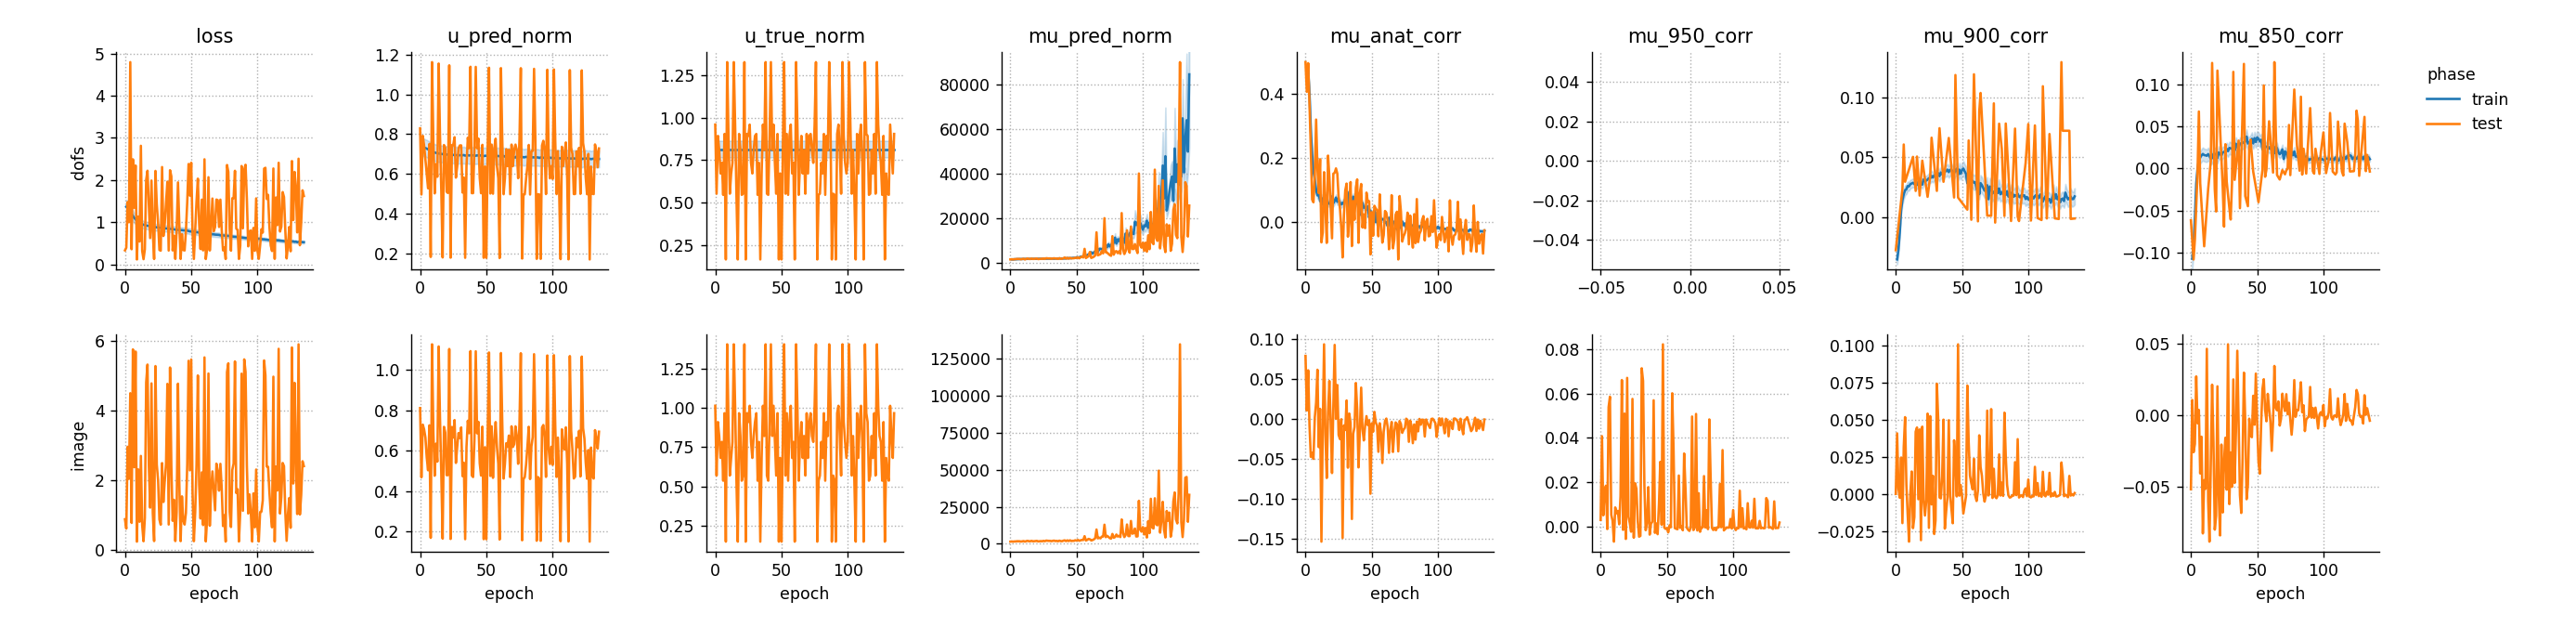

anat


<IPython.core.display.Javascript object>


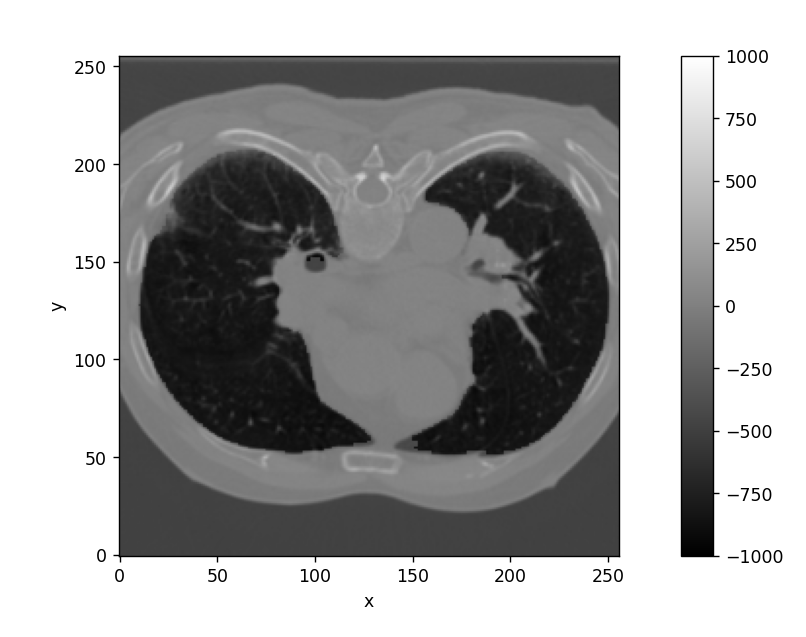

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

emph


<IPython.core.display.Javascript object>


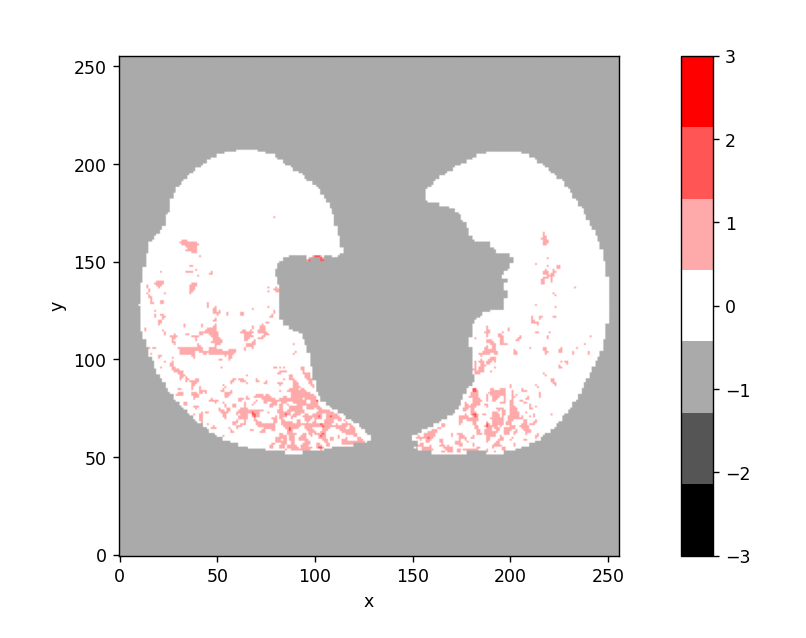

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

mu_pred


<IPython.core.display.Javascript object>


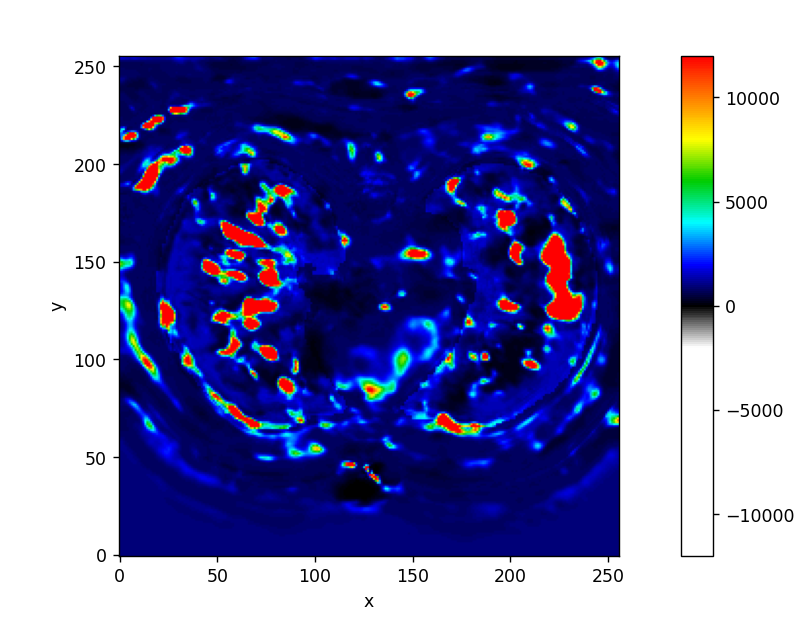

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

u_pred


<IPython.core.display.Javascript object>


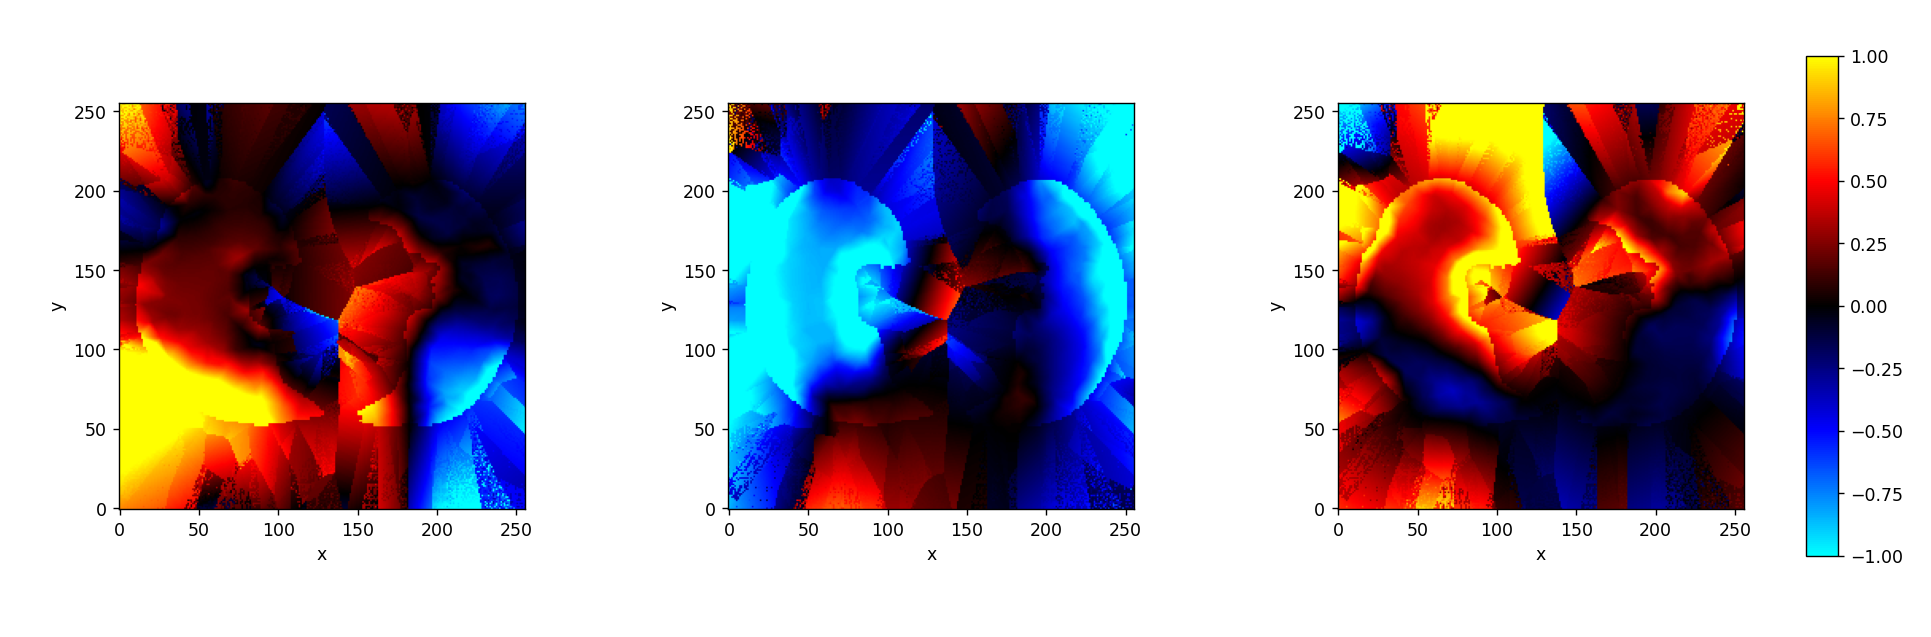

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

u_true


<IPython.core.display.Javascript object>


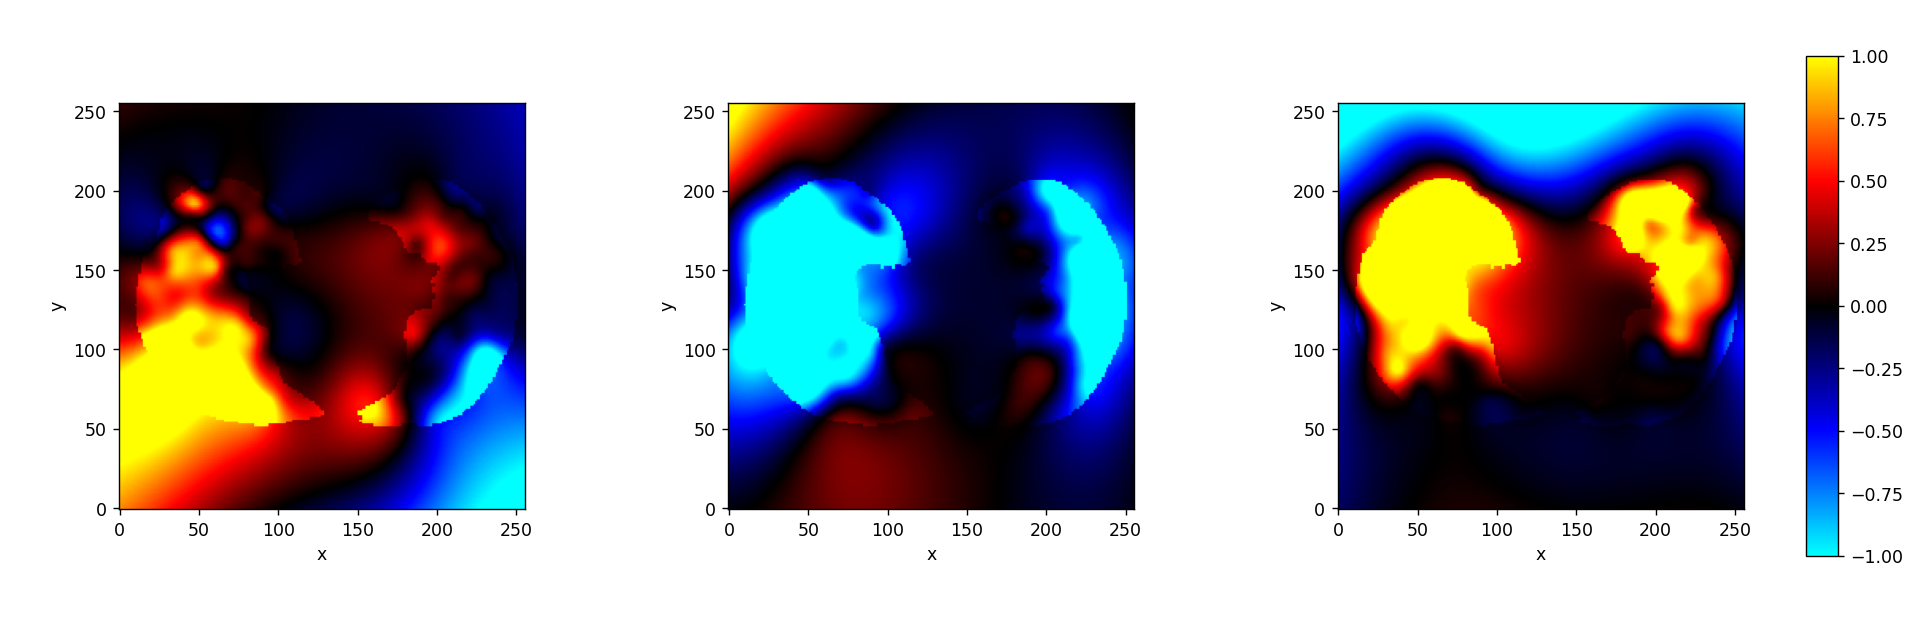

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

0.3312
CPU times: user 2min 13s, sys: 957 ms, total: 2min 14s
Wall time: 2min 12s


In [10]:
%%time
# test forward pass and initialize viewers
trainer.timer.start()
trainer.run_next_batch(phase='test', epoch=0)

In [12]:
trainer.save_metrics()
trainer.save_viewers()
trainer.save_state()

In [ ]:
%%time
trainer.timer.start()
trainer.train(num_epochs=100)

Training...
Epoch 101/200
Running train phase
['case3_T30.nii', 'case1_T80.nii']..0.5221
['case9_T70.nii', 'case6_T30.nii']..0.3913
['case3_T70.nii', 'case3_T90.nii']..0.5548
['case6_T80.nii', 'case5_T90.nii']..0.5562
['case7_T60.nii', 'case2_T50.nii']..1.1773
['case7_T50.nii', 'case6_T60.nii']..0.4701
['case2_T70.nii', 'case6_T40.nii']..0.6098
['case5_T40.nii', 'case9_T50.nii']..0.5660
['case2_T90.nii', 'case8_T50.nii']..0.8270
['case9_T90.nii', 'case7_T70.nii']..0.4713
['case8_T60.nii', 'case3_T20.nii']..0.4943
['case1_T10.nii', 'case4_T50.nii']..0.9499
['case9_T20.nii', 'case5_T60.nii']..0.3921
['case8_T90.nii', 'case8_T40.nii']..0.6759
['case2_T10.nii', 'case9_T60.nii']..0.2981
['case10_T30.nii', 'case10_T20.nii']..0.4122
['case4_T60.nii', 'case6_T50.nii']..0.6862
['case9_T40.nii', 'case10_T10.nii']..0.5520
['case6_T70.nii', 'case10_T40.nii']..0.4115
['case10_T80.nii', 'case3_T50.nii']..0.6204
['case5_T20.nii', 'case6_T20.nii']..0.6888
['case4_T90.nii', 'case6_T90.nii']..0.2634
['c

['case4_T20.nii', 'case7_T40.nii']..0.5758
['case2_T80.nii', 'case9_T10.nii']..0.4142
['case9_T40.nii', 'case7_T80.nii']..0.4612
['case10_T80.nii', 'case3_T40.nii']..0.5881
['case5_T20.nii', 'case4_T30.nii']..0.6266
['case8_T50.nii', 'case7_T50.nii']..0.6065
['case4_T10.nii', 'case1_T60.nii']..0.5457
['case4_T60.nii', 'case10_T10.nii']..0.8412
['case8_T20.nii', 'case5_T50.nii']..0.5461
['case10_T90.nii', 'case7_T20.nii']..0.4761
['case2_T20.nii', 'case5_T90.nii']..0.8097
['case6_T60.nii', 'case9_T50.nii']..0.2083
['case6_T20.nii', 'case10_T70.nii']..0.4140
['case1_T40.nii', 'case2_T50.nii']..1.3684
['case5_T30.nii', 'case10_T20.nii']..0.8240
['case2_T30.nii', 'case1_T10.nii']..1.1908
['case7_T70.nii', 'case8_T10.nii']..0.2495
['case8_T80.nii', 'case1_T70.nii']..0.4076
['case2_T90.nii', 'case4_T50.nii']..1.1272
['case6_T10.nii', 'case10_T60.nii']..0.3588
['case8_T70.nii', 'case10_T50.nii']..0.2040
['case2_T10.nii', 'case8_T90.nii']..0.7100
['case1_T20.nii', 'case4_T80.nii']..0.4065
['ca

['case10_T20.nii', 'case3_T90.nii']..0.5686
['case5_T70.nii', 'case4_T90.nii']..0.3936
['case5_T30.nii', 'case1_T10.nii']..1.0059
['case8_T20.nii', 'case5_T80.nii']..0.6771
['case6_T70.nii', 'case1_T80.nii']..0.5353
['case3_T40.nii', 'case6_T80.nii']..0.6038
['case1_T60.nii', 'case7_T50.nii']..0.7268
['case10_T30.nii', 'case9_T50.nii']..0.2691
['case7_T60.nii', 'case8_T30.nii']..0.6042
['case2_T30.nii', 'case2_T50.nii']..1.5977
['case1_T90.nii', 'case1_T20.nii']..1.0665
['case3_T20.nii', 'case9_T80.nii']..0.3561
['case5_T20.nii', 'case5_T60.nii']..0.5968
['case8_T80.nii', 'case2_T40.nii']..0.9324
['case8_T90.nii', 'case4_T80.nii']..0.6045
['case9_T70.nii', 'case3_T70.nii']..0.3800
['case8_T50.nii', 'case4_T40.nii']..0.5836
['case8_T70.nii', 'case7_T30.nii']..0.3454
['case1_T30.nii', 'case6_T60.nii']..0.7213
['case6_T20.nii', 'case8_T60.nii']..0.5410
['case2_T60.nii', 'case4_T10.nii']..0.5915
['case6_T90.nii', 'case1_T40.nii']..0.5837
['case6_T50.nii', 'case9_T30.nii']..0.3973
['case7_T

['case10_T70.nii', 'case7_T70.nii']..0.2885
['case5_T20.nii', 'case10_T50.nii']..0.4828
['case4_T40.nii', 'case1_T70.nii']..0.7044
['case4_T30.nii', 'case3_T30.nii']..0.5008
['case6_T10.nii', 'case9_T80.nii']..0.4251
['case4_T50.nii', 'case10_T20.nii']..0.6886
['case3_T50.nii', 'case5_T80.nii']..0.9183
['case4_T90.nii', 'case6_T30.nii']..0.2623
['case5_T90.nii', 'case6_T20.nii']..0.7088
['case5_T50.nii', 'case8_T10.nii']..0.3921
['case8_T60.nii', 'case1_T90.nii']..0.9903
['case3_T20.nii', 'case8_T20.nii']..0.4186
['case4_T10.nii', 'case6_T60.nii']..0.2884
['case3_T70.nii', 'case6_T50.nii']..0.3625
['case10_T30.nii', 'case1_T40.nii']..0.5814
['case9_T40.nii', 'case3_T10.nii']..0.5298
['case8_T90.nii', 'case2_T80.nii']..0.8956
['case1_T60.nii', 'case10_T10.nii']..0.6006
['case4_T20.nii', 'case4_T80.nii']..0.4939
['case1_T80.nii', 'case7_T20.nii']..0.5811
['case2_T10.nii', 'case4_T70.nii']..0.2717
['case2_T20.nii', 'case8_T80.nii']..0.4674
['case9_T70.nii', 'case7_T30.nii']..0.4952
['case

['case10_T90.nii', 'case7_T20.nii']..0.4431
['case5_T90.nii', 'case9_T50.nii']..0.5448
['case9_T10.nii', 'case4_T60.nii']..0.5481
['case2_T10.nii', 'case1_T30.nii']..0.8389
['case5_T70.nii', 'case6_T10.nii']..0.4784
['case3_T70.nii', 'case8_T50.nii']..0.3921
['case10_T30.nii', 'case8_T40.nii']..0.3333
['case7_T50.nii', 'case3_T40.nii']..0.8997
['case3_T80.nii', 'case8_T10.nii']..0.2351
['case1_T80.nii', 'case10_T70.nii']..0.4270
['case6_T80.nii', 'case5_T80.nii']..0.4779
['case3_T90.nii', 'case2_T90.nii']..0.9273
['case4_T70.nii', 'case1_T10.nii']..0.5665
['case4_T10.nii', 'case10_T80.nii']..0.2330
['case6_T50.nii', 'case4_T90.nii']..0.3111
['case7_T90.nii', 'case9_T80.nii']..0.4327
['case4_T50.nii', 'case9_T40.nii']..0.7126
['case5_T50.nii', 'case9_T30.nii']..0.4934
['case8_T30.nii', 'case4_T40.nii']..0.7725
['case8_T60.nii', 'case6_T30.nii']..0.4161
['case8_T80.nii', 'case5_T60.nii']..0.2871
['case3_T30.nii', 'case6_T70.nii']..0.4339
['case3_T10.nii', 'case7_T70.nii']..0.3754
['case5

['case6_T90.nii', 'case3_T70.nii']..0.3117
['case7_T70.nii', 'case2_T70.nii']..0.4327
['case1_T20.nii', 'case7_T30.nii']..0.5263
['case10_T10.nii', 'case3_T30.nii']..0.5026
['case6_T40.nii', 'case9_T50.nii']..0.3331
['case2_T60.nii', 'case3_T50.nii']..0.8595
['case6_T20.nii', 'case1_T80.nii']..0.5032
['case3_T80.nii', 'case4_T90.nii']..0.2203
['case8_T10.nii', 'case4_T10.nii']..0.2884
['case9_T20.nii', 'case10_T70.nii']..0.3202
['case8_T80.nii', 'case8_T90.nii']..0.5649
['case6_T50.nii', 'case10_T80.nii']..0.2470
['case9_T80.nii', 'case1_T40.nii']..0.5455
['case1_T10.nii', 'case5_T30.nii']..0.9779
['case5_T40.nii', 'case4_T30.nii']..0.7361
['case7_T20.nii', 'case9_T90.nii']..0.6303
['case8_T40.nii', 'case6_T80.nii']..0.2506
['case7_T60.nii', 'case1_T60.nii']..0.5839
['case2_T10.nii', 'case5_T80.nii']..0.6022
['case2_T20.nii', 'case7_T50.nii']..0.6785
['case5_T70.nii', 'case5_T10.nii']..0.4523
['case7_T10.nii', 'case9_T30.nii']..0.4940
['case6_T60.nii', 'case6_T70.nii']..0.3134
['case5_

['case8_T10.nii', 'case1_T80.nii']..0.3969
['case2_T10.nii', 'case9_T60.nii']..0.2892
['case4_T40.nii', 'case9_T80.nii']..0.5105
['case2_T90.nii', 'case10_T80.nii']..0.6244
['case5_T80.nii', 'case3_T30.nii']..0.6116
['case1_T10.nii', 'case7_T70.nii']..0.5675
['case10_T50.nii', 'case6_T30.nii']..0.2022
['case9_T10.nii', 'case8_T70.nii']..0.1546
['case7_T50.nii', 'case4_T60.nii']..0.8743
['case1_T90.nii', 'case8_T20.nii']..0.9251
['case7_T60.nii', 'case4_T10.nii']..0.4705
['case7_T10.nii', 'case6_T80.nii']..0.3288
['case3_T10.nii', 'case3_T50.nii']..0.7022
['case2_T60.nii', 'case2_T30.nii']..1.0725
['case5_T90.nii', 'case9_T70.nii']..0.6419
['case8_T90.nii', 'case6_T70.nii']..0.6815
['case9_T20.nii', 'case4_T70.nii']..0.2787
['case6_T90.nii', 'case10_T30.nii']..0.3195
['case7_T30.nii', 'case9_T90.nii']..0.5848
['case6_T50.nii', 'case6_T40.nii']..0.4068
['case8_T30.nii', 'case5_T70.nii']..0.5255
['case1_T20.nii', 'case4_T50.nii']..0.7449
['case10_T00.nii'].0.3090
Epoch 126/200
Running tra

['case2_T60.nii', 'case3_T80.nii']..0.4627
['case9_T20.nii', 'case10_T60.nii']..0.3495
['case10_T90.nii', 'case8_T60.nii']..0.4660
['case3_T50.nii', 'case2_T40.nii']..1.1578
['case5_T90.nii', 'case4_T60.nii']..1.0470
['case2_T20.nii', 'case9_T40.nii']..0.5572
['case2_T50.nii', 'case4_T20.nii']..1.1088
['case8_T10.nii', 'case3_T40.nii']..0.6276
['case1_T20.nii', 'case7_T80.nii']..0.4497
['case4_T10.nii', 'case8_T30.nii']..0.4784
['case6_T30.nii', 'case9_T70.nii']..0.3182
['case4_T80.nii', 'case9_T90.nii']..0.4284
['case8_T20.nii', 'case9_T50.nii']..0.3032
['case6_T10.nii', 'case9_T10.nii']..0.2426
['case6_T90.nii', 'case10_T20.nii']..0.3601
['case7_T20.nii', 'case5_T60.nii']..0.4666
['case8_T80.nii', 'case6_T40.nii']..0.3464
['case3_T30.nii', 'case5_T20.nii']..0.5849
['case6_T00.nii'].1.7970
Epoch 130/200
Running train phase
['case2_T80.nii', 'case7_T60.nii']..0.6112
['case3_T80.nii', 'case4_T60.nii']..0.5285
['case4_T40.nii', 'case3_T30.nii']..0.5451
['case10_T60.nii', 'case10_T10.nii'

['case1_T80.nii', 'case7_T10.nii']..0.5393
['case6_T20.nii', 'case2_T30.nii']..0.8609
['case9_T50.nii', 'case6_T40.nii']..0.3231
['case3_T50.nii', 'case1_T10.nii']..0.8811
['case6_T60.nii', 'case5_T10.nii']..0.2906
['case9_T40.nii', 'case9_T90.nii']..0.6233
['case4_T30.nii', 'case2_T40.nii']..1.0680
['case5_T60.nii', 'case1_T20.nii']..0.5001
['case5_T20.nii', 'case8_T20.nii']..0.5907
['case3_T60.nii', 'case10_T30.nii']..0.3563
['case3_T30.nii', 'case5_T80.nii']..0.5837
['case1_T90.nii', 'case7_T20.nii']..0.9443
['case8_T70.nii', 'case4_T50.nii']..0.5350
['case1_T30.nii', 'case2_T10.nii']..0.7596
['case7_T00.nii'].0.9923
Epoch 134/200
Running train phase
['case3_T10.nii', 'case5_T20.nii']..0.6204
['case4_T90.nii', 'case9_T60.nii']..0.2258
['case6_T90.nii', 'case9_T50.nii']..0.2298
['case4_T20.nii', 'case7_T50.nii']..0.7402
['case10_T30.nii', 'case8_T60.nii']..0.4535
['case3_T50.nii', 'case10_T50.nii']..0.5112
['case7_T20.nii', 'case3_T30.nii']..0.4653
['case1_T60.nii', 'case3_T90.nii'].

In [ ]:
trainer.evaluator.metrics

In [ ]:
trainer.timer.usage

In [ ]:
trainer.timer.usage.groupby(['phase', 'event']).mean().sort_values('time')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage, y='event', x='time', hue='phase', estimator='mean', ax=ax)
ax.set_xlabel('time (s)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage , y='event', x='time', hue='phase', estimator='sum', ax=ax)
#ax.set_xscale('log')
ax.set_xlabel('time (s)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(trainer.timer.usage, y='time', x='phase', estimator='mean', ax=ax)
ax.set_ylabel('time (s)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(trainer.timer.usage, y='time', x='phase', estimator='sum', ax=ax)
ax.set_ylabel('time (s)')
fig.tight_layout()

In [ ]:
test_data[0][-5].mean()